In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500)

In [2]:
data = pd.read_csv('Telco.csv')

In [3]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#There are no null values present
for col in list(data.columns):
    print(f'{col.upper()} has {data[col].isnull().sum()} NA\'s and data type is {data[col].dtype}')

CUSTOMERID has 0 NA's and data type is object
GENDER has 0 NA's and data type is object
SENIORCITIZEN has 0 NA's and data type is int64
PARTNER has 0 NA's and data type is object
DEPENDENTS has 0 NA's and data type is object
TENURE has 0 NA's and data type is int64
PHONESERVICE has 0 NA's and data type is object
MULTIPLELINES has 0 NA's and data type is object
INTERNETSERVICE has 0 NA's and data type is object
ONLINESECURITY has 0 NA's and data type is object
ONLINEBACKUP has 0 NA's and data type is object
DEVICEPROTECTION has 0 NA's and data type is object
TECHSUPPORT has 0 NA's and data type is object
STREAMINGTV has 0 NA's and data type is object
STREAMINGMOVIES has 0 NA's and data type is object
CONTRACT has 0 NA's and data type is object
PAPERLESSBILLING has 0 NA's and data type is object
PAYMENTMETHOD has 0 NA's and data type is object
MONTHLYCHARGES has 0 NA's and data type is float64
TOTALCHARGES has 0 NA's and data type is object
CHURN has 0 NA's and data type is object


In [5]:
cust_id = data['customerID']
data.drop('customerID',inplace = True, axis = 1)

In [6]:
#Let us check cardinality of columns which appear to be objective in nature
for col in list(data.columns):
    print(f'{col} has \n {data[col].value_counts()}')
    print()
    print()

gender has 
 Male      3555
Female    3488
Name: gender, dtype: int64


SeniorCitizen has 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Partner has 
 No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents has 
 No     4933
Yes    2110
Name: Dependents, dtype: int64


tenure has 
 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


PhoneService has 
 Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines has 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService has 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity has 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup has 
 No                     3088
Yes                    2429


In [9]:
#From the above we can see monthly charges, total charges,Tenure are continous cols.
#We can either smoothen them by creating bins or leave as they are.
#Remaining cols can be dummied as they are categorical type
#total charges has missing category, we will replace with 0
data['TotalCharges'].replace([' '],0,inplace = True)
data['TotalCharges'] = data['TotalCharges'].astype("float")

In [33]:
#data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [34]:
#data.drop('TotalCharges',inplace = True,axis = 1)

In [10]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


In [11]:
## Create dummy variables
df_dummy = pd.get_dummies(data, drop_first=True)

In [12]:
df_dummy.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [13]:
from sklearn.model_selection import train_test_split
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.01)
cph_train, cph_test = train_test_split(df_dummy, test_size=0.2)
cph.fit(cph_train, 'tenure', 'Churn_Yes')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4147 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1487
   partial log-likelihood = -10056.01
         time fit was run = 2021-02-10 03:14:31 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
SeniorCitizen                           0.05       1.05       0.06            -0.08             0.17                 0.93                 1.19
MonthlyCharges                          0.01       1.01       0.00            -0.00             0.02                 1.00                 1.02
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
gender_Male                            -0.08       0.92       0.05            -0.18             0.02                 0.84                 1.02
Partner_Yes                            -0.26       0.77       0.06            -0.38            -0.14                 0.68                 0.87
Dependents_Yes                         -0.04       0.96       0.07            -0.18             0.11                 0.83                 1.11
PhoneService_Yes                        0.30       1.35       0.33            -0.34             0.94                 0.71                 2.56
MultipleLines_No phone service         -0.30       0.74       0.33            -0.94             0.34                 0.39                 1.40
MultipleLines_Yes                      -0.04       0.96       0.06            -0.16             0.08                 0.85                 1.08
InternetService_Fiber optic             0.86       2.37       0.12             0.63             1.10                 1.88                 2.99
InternetService_No                     -0.28       0.76       0.30            -0.87             0.31                 0.42                 1.37
OnlineSecurity_No internet service     -0.28       0.76       0.30            -0.87             0.31                 0.42                 1.37
OnlineSecurity_Yes                     -0.37       0.69       0.08            -0.52            -0.22                 0.60                 0.80
OnlineBackup_No internet service       -0.28       0.76       0.30            -0.87             0.31                 0.42                 1.37
OnlineBackup_Yes                       -0.18       0.84       0.06            -0.30            -0.05                 0.74                 0.95
DeviceProtection_No internet service   -0.28       0.76       0.30            -0.87             0.31                 0.42                 1.37
DeviceProtection_Yes                   -0.02       0.98       0.06            -0.14             0.11                 0.87                 1.11
TechSupport_No internet service        -0.28       0.76       0.30            -0.87             0.31                 0.42                 1.37
TechSupport_Yes                        -0.20       0.82       0.07            -0.34            -0.05                 0.71                 0.95
StreamingTV_No internet service        -0.28       0.76       0.30            -0.87             0.31                 0.42                 1.37
StreamingTV_Yes                         0.19       1.21       0.07             0.06             0.33                 1.06                 1.39
StreamingMovies_No internet service    -0.28       0.76       0.30            -0.87             0.31                 0.42                 1.37
StreamingMovies_Yes                     0.20       1.22       0.07             0.06             0.33                 1.06             

In [ ]:
#We got out summary. Coefficients that are positive contribute positively towards customer churn
#Coefficients that are negative contribute negatively towards customer churn

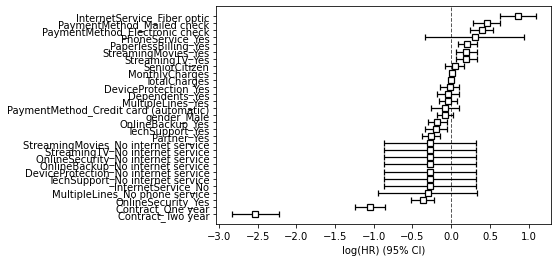

In [18]:
cph.plot()

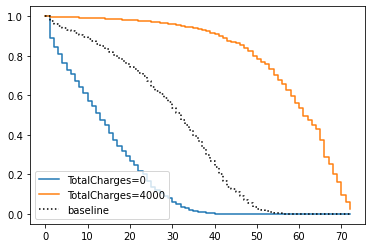

In [26]:
cph.plot_partial_effects_on_outcome('TotalCharges', values=[0,4000],plot_baseline = True)

In [38]:
#Survival curves at customer level
tr_rows = df_dummy.iloc[10:20]
tr_rows

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
10,0,13,49.95,587.45,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11,0,16,18.95,326.80,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
12,0,58,100.35,5681.10,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0
13,0,49,103.70,5036.30,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
14,0,25,105.50,2686.05,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
15,0,69,113.25,7895.15,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
16,0,52,20.65,1022.95,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
17,0,71,106.70,7382.25,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
18,0,10,55.20,528.35,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
19,0,21,90.05,1862.90,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0


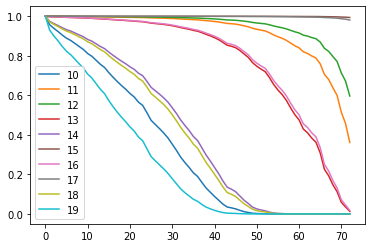

In [39]:
cph.predict_survival_function(tr_rows).plot()

In [ ]:
#This the Just a basic model. We can further improve model by removing insignificant variables
#Using the conditioned parameter to let the model know the customer is still active before estimating the churn